#### Overview
CRS(Coordinate Reference System, 좌표계)를 확인하고 변경

#### Import Libraries

In [1]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt

# High-Resolution Graph Output option for Retina Displays
%config InlineBackend.figure_format = 'retina'

#### Fetching NGII Data(SHP data)

In [2]:
SHP_PATH = os.path.join(os.getcwd(), '89_data', 'shp', 'NGII_SIDO', 'Z_NGII_N3A_G0010000.shp')
sido_gdf = gpd.read_file(SHP_PATH, encoding='cp949')  # euc-kr도 가능
sido_gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   UFID      17 non-null     object  
 1   BJCD      17 non-null     object  
 2   NAME      17 non-null     object  
 3   DIVI      17 non-null     object  
 4   SCLS      0 non-null      float64 
 5   FMTA      0 non-null      float64 
 6   geometry  17 non-null     geometry
dtypes: float64(2), geometry(1), object(4)
memory usage: 1.1+ KB


In [3]:
sido_gdf.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,NaN,NaN,"MULTIPOLYGON (((932629.315 1508520.449, 932629..."
1,ARB0100000000002F,4800000000,경상남도,HJD004,NaN,NaN,"MULTIPOLYGON (((1049231.579 1666542.963, 10492..."
2,ARB0100000000003G,4700000000,경상북도,HJD004,NaN,NaN,"MULTIPOLYGON (((1163496.075 1906689.767, 11635..."
3,ARB0100000000004H,4600000000,전라남도,HJD004,NaN,NaN,"MULTIPOLYGON (((898759.456 1670482.743, 898760..."
4,ARB0100000000005I,4500000000,전라북도,HJD004,NaN,NaN,"MULTIPOLYGON (((953538.952 1794637.930, 953543..."


#### Check CRS(Coordinate Reference System)

In [4]:
sido_gdf.crs

<Bound CRS: PROJCS["Korea 2000 / Unified CS",GEOGCS["Korea 200 ...>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- [east]: Easting (m)
- [north]: Northing (m)
Area of Use:
- undefined
Coordinate Operation:
- name: Transformation from Korea 2000 to WGS84
- method: Position Vector transformation (geog2D domain)
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich
Source CRS: Korea 2000 / Unified CS

#### Insert CRS

In [5]:
sido_gdf.crs = 'epsg:5179'
sido_gdf.crs

<Projected CRS: EPSG:5179>
Name: Korea 2000 / Unified CS
Axis Info [cartesian]:
- X[north]: Northing (metre)
- Y[east]: Easting (metre)
Area of Use:
- name: Republic of Korea (South Korea) - onshore and offshore.
- bounds: (122.71, 28.6, 134.28, 40.27)
Coordinate Operation:
- name: Korea Unified Belt
- method: Transverse Mercator
Datum: Geocentric datum of Korea
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

#### Change CRS with to_crs()

In [6]:
sido_gdf_epsg4326 = sido_gdf.to_crs(epsg=4326)
sido_gdf_epsg4326.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

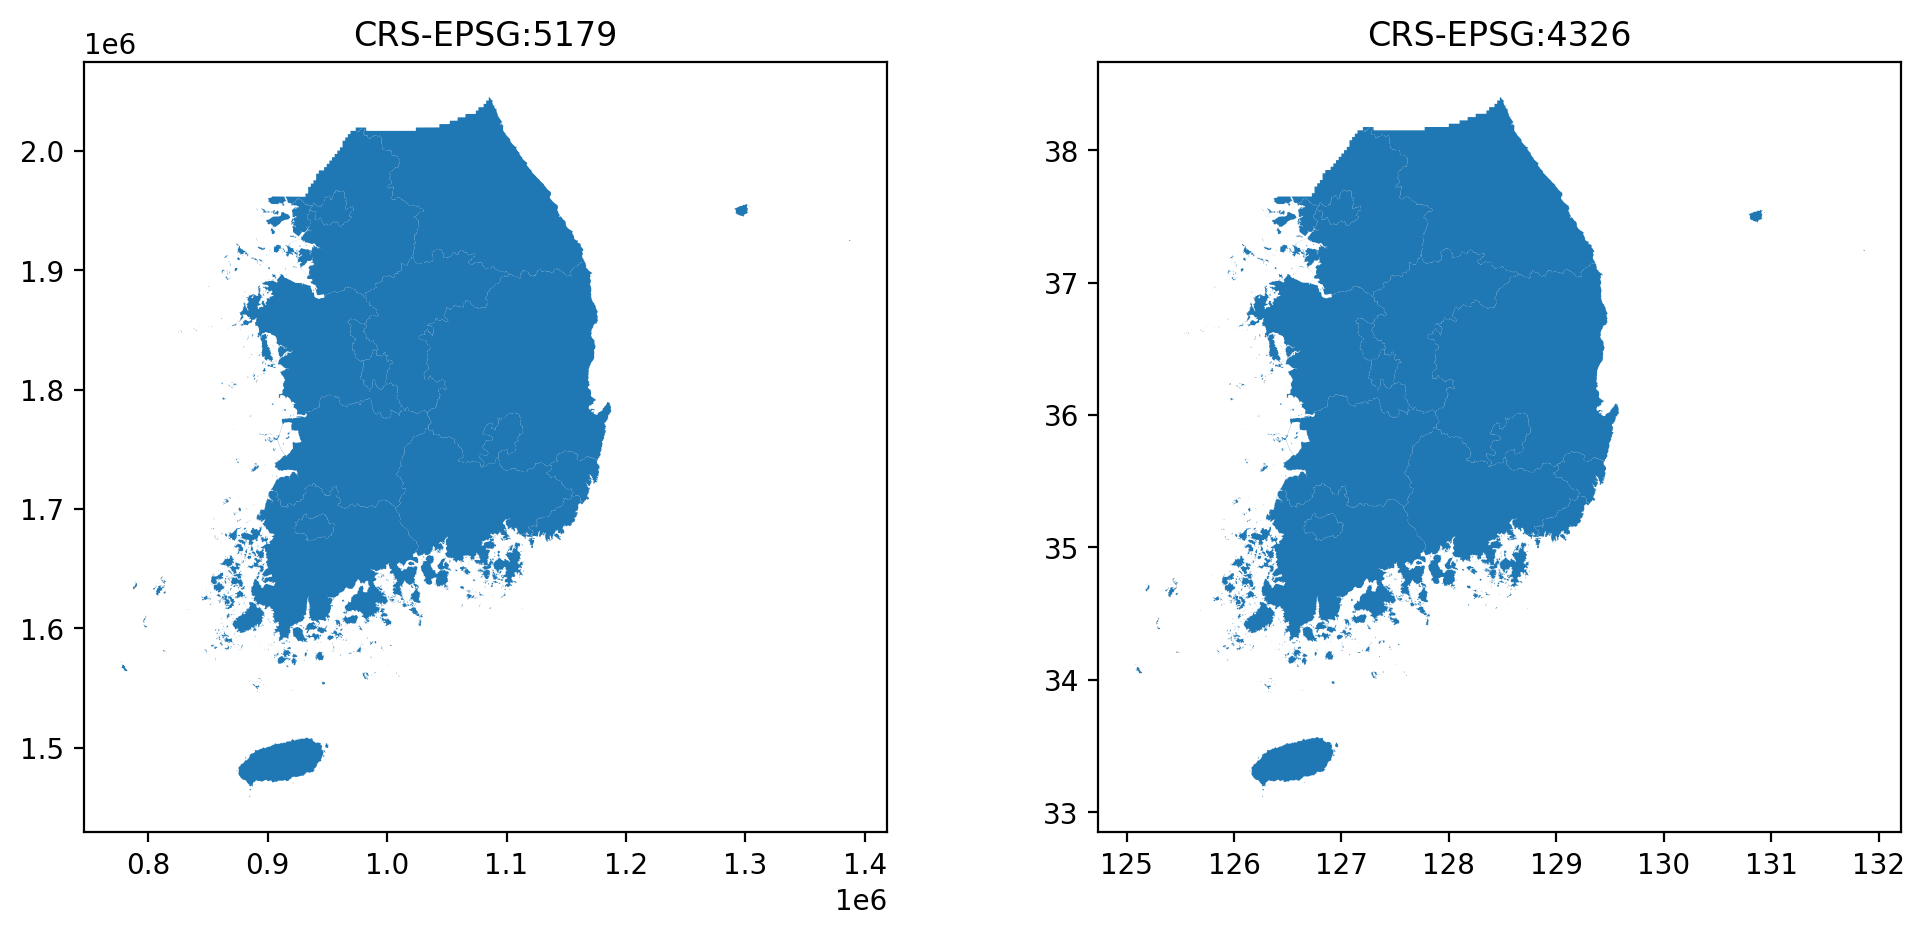

In [7]:
fig, axes = plt.subplots(1,2, figsize=(12, 5))
axes[0].set_title('CRS-EPSG:5179')
sido_gdf.plot(ax=axes[0])
axes[1].set_title('CRS-EPSG:4326')
sido_gdf_epsg4326.plot(ax=axes[1])

plt.show()
# 위 경도 정보만 다름

In [8]:
sido_gdf.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,NaN,NaN,"MULTIPOLYGON (((932629.315 1508520.449, 932629..."
1,ARB0100000000002F,4800000000,경상남도,HJD004,NaN,NaN,"MULTIPOLYGON (((1049231.579 1666542.963, 10492..."
2,ARB0100000000003G,4700000000,경상북도,HJD004,NaN,NaN,"MULTIPOLYGON (((1163496.075 1906689.767, 11635..."
3,ARB0100000000004H,4600000000,전라남도,HJD004,NaN,NaN,"MULTIPOLYGON (((898759.456 1670482.743, 898760..."
4,ARB0100000000005I,4500000000,전라북도,HJD004,NaN,NaN,"MULTIPOLYGON (((953538.952 1794637.930, 953543..."


In [9]:
sido_gdf_epsg4326.head()

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
0,ARB0100000000001E,5000000000,제주특별자치도,HJD004,NaN,NaN,"MULTIPOLYGON (((126.77414 33.56657, 126.77414 ..."
1,ARB0100000000002F,4800000000,경상남도,HJD004,NaN,NaN,"MULTIPOLYGON (((128.03946 34.99262, 128.03946 ..."
2,ARB0100000000003G,4700000000,경상북도,HJD004,NaN,NaN,"MULTIPOLYGON (((129.34094 37.14464, 129.34099 ..."
3,ARB0100000000004H,4600000000,전라남도,HJD004,NaN,NaN,"MULTIPOLYGON (((126.39023 35.02427, 126.39024 ..."
4,ARB0100000000005I,4500000000,전라북도,HJD004,NaN,NaN,"MULTIPOLYGON (((126.98353 36.14769, 126.98359 ..."


In [10]:
sido_gdf[sido_gdf['NAME']=='충청북도']

,UFID,BJCD,NAME,DIVI,SCLS,FMTA,geometry
6,ARB0100000000007K,4300000000,충청북도,HJD004,NaN,NaN,"POLYGON ((1042565.907 1917797.156, 1042636.422..."
